# **Downloading The file from Google Drive**

In [2]:
! gdown --id 1DmUGRD-zukioKqBJqzNuSLTv5TOtf90p



/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1DmUGRD-zukioKqBJqzNuSLTv5TOtf90p
From (redirected): https://drive.google.com/uc?id=1DmUGRD-zukioKqBJqzNuSLTv5TOtf90p&confirm=t&uuid=d6b75495-d0e1-4148-90bd-b092ccd6ad11
To: /content/CIFAR-10-images-master.zip
100% 55.8M/55.8M [00:00<00:00, 120MB/s]


# Unzipping The file

In [3]:
!unzip /content/CIFAR-10-images-master.zip

Streaming output truncated to the last 5000 lines.
  inflating: CIFAR-10-images-master/train/truck/0000.jpg  
  inflating: CIFAR-10-images-master/train/truck/0001.jpg  
  inflating: CIFAR-10-images-master/train/truck/0002.jpg  
  inflating: CIFAR-10-images-master/train/truck/0003.jpg  
  inflating: CIFAR-10-images-master/train/truck/0004.jpg  
  inflating: CIFAR-10-images-master/train/truck/0005.jpg  
  inflating: CIFAR-10-images-master/train/truck/0006.jpg  
  inflating: CIFAR-10-images-master/train/truck/0007.jpg  
  inflating: CIFAR-10-images-master/train/truck/0008.jpg  
  inflating: CIFAR-10-images-master/train/truck/0009.jpg  
  inflating: CIFAR-10-images-master/train/truck/0010.jpg  
  inflating: CIFAR-10-images-master/train/truck/0011.jpg  
  inflating: CIFAR-10-images-master/train/truck/0012.jpg  
  inflating: CIFAR-10-images-master/train/truck/0013.jpg  
  inflating: CIFAR-10-images-master/train/truck/0014.jpg  
  inflating: CIFAR-10-images-master/train/truck/0015.jpg  
  inf

# Including Necessary Header FIles
1. sk-learn
2. cv2
3. matplotlib
4. os
5. glob
6. skimage

In [1]:
from skimage.feature import hog
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# View Image
We have loaded an Image for checking for furthur processing

image:  (32, 32, 3)


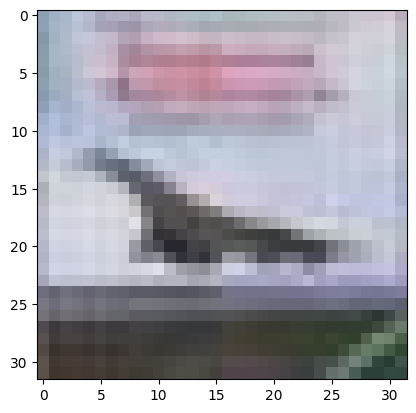

In [2]:
img = np.array(mpimg.imread('/content/CIFAR-10-images-master/test/airplane/0000.jpg'))
img.setflags(write=1)
print('image: ', img.shape)
plt.imshow(img)
plt.show()

# Resizing Image

The Image was resized to 32,32 pixels for reducing load from Google Colab servers

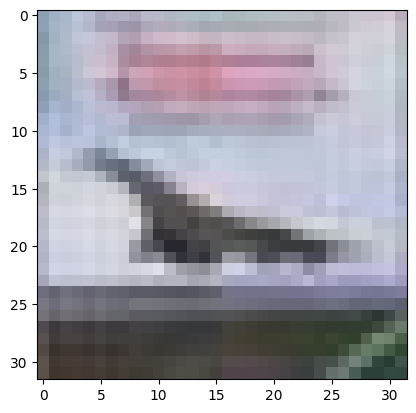

(32, 32, 3)


In [3]:
resized_img = cv2.resize(img,(32,32))
plt.imshow(resized_img)
plt.show()
print(resized_img.shape)

# Grayscale Image
This image was turned to grayscale image for reducing Load from the Google colab server


(324,)
[0.12289523 0.07285873 0.02254765 0.00464298 0.02225129 0.04511014
 0.00927719 0.04684367 0.13833722 0.03518563 0.01710244 0.00371876
 0.07335362 0.19788371 0.1041227  0.01864666 0.0399843  0.00838845
 0.02941866 0.01252893 0.01498813 0.05458684 0.25993748 0.10422976
 0.01427526 0.00570432 0.00722109 0.02151719 0.03549209 0.03426088
 0.04550969 0.10863708 0.18902028 0.20535181 0.02664611 0.02690841
 0.         0.         0.01822191 0.05774341 0.22803926 0.20367895
 0.25993748 0.00824058 0.         0.00229948 0.00205672 0.02001865
 0.05833619 0.156271   0.06091585 0.01470475 0.01256734 0.
 0.06059559 0.01149973 0.00443692 0.02048532 0.25544602 0.0448577
 0.00727627 0.03340314 0.03009221 0.07266811 0.09957069 0.08148263
 0.11687239 0.25993748 0.25993748 0.22680922 0.12828171 0.15833352
 0.0068767  0.01645871 0.00245352 0.17907423 0.25993748 0.25993748
 0.1236546  0.00411344 0.         0.03746293 0.01820935 0.00395945
 0.07810124 0.21069123 0.11086177 0.01985351 0.04257218 0.008931

<ipython-input-4-4181bfedb062>:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image=hog(resized_img, visualize=True,multichannel=True)


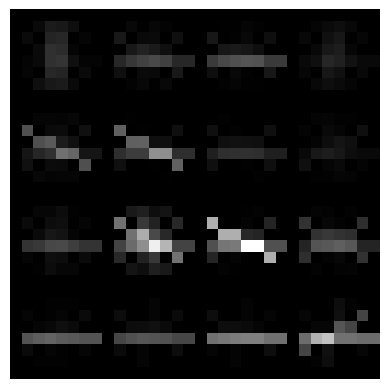

In [4]:
fd, hog_image=hog(resized_img, visualize=True,multichannel=True)
print(fd.shape)
print(fd)
print(hog_image.shape)
plt.axis("off")
plt.imshow(hog_image,cmap="gray")
plt.show()

# Train Dataset Entry

1. We have loaded the Training Dataset for all 10 category of objects.
2. Image was resized to 32,32
3. The images were reduced and converted to grayscale for easier processing.

Finally All 10 category images were stored into the train_dataset variable

Each category contained 5000 images and there were 10 categories. So summing up to 50000 images for processing. We can also see the number in the bottom.

In [5]:
#For Airplane
data_airplane = []
for entry in glob.glob("/content/CIFAR-10-images-master/train/airplane/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(32,32) )
  resized_img_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
  data_airplane.append(fd)
#For Automobile
data_automobile = []
for entry in glob.glob("/content/CIFAR-10-images-master/train/automobile/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(32,32) )
  resized_img_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
  data_automobile.append(fd)
#for bird

data_bird = []
for entry in glob.glob("/content/CIFAR-10-images-master/train/bird/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(32,32) )
  resized_img_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
  data_bird.append(fd)


#for cat
data_cat= []
for entry in glob.glob("/content/CIFAR-10-images-master/train/cat/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(32,32) )
  resized_img_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
  data_cat.append(fd)

#for deer
data_deer = []
for entry in glob.glob("/content/CIFAR-10-images-master/train/deer/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(32,32) )
  resized_img_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
  data_deer.append(fd)

#for dog
data_dog = []
for entry in glob.glob("/content/CIFAR-10-images-master/train/dog/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(32,32) )
  resized_img_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
  data_dog.append(fd)


#for frog
data_frog = []
for entry in glob.glob("/content/CIFAR-10-images-master/train/frog/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(32,32) )
  resized_img_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
  data_frog.append(fd)

#for horse
data_horse = []
for entry in glob.glob("/content/CIFAR-10-images-master/train/horse/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(32,32) )
  resized_img_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
  data_horse.append(fd)

#for ship
data_ship = []
for entry in glob.glob("/content/CIFAR-10-images-master/train/ship/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(32,32) )
  resized_img_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
  data_ship.append(fd)

#for truc
data_truck = []
for entry in glob.glob("/content/CIFAR-10-images-master/train/truck/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(32,32) )
  resized_img_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
  data_truck.append(fd)

#combining data
train_data = data_airplane+data_automobile+data_bird+data_cat+data_dog+data_deer+data_frog+data_horse+data_ship+data_truck
print(len(train_data))


<ipython-input-5-114e17527a42>:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
<ipython-input-5-114e17527a42>:15: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
<ipython-input-5-114e17527a42>:24: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
<ipython-input-5-114e17527a42>:34: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
<ipython-input-5-114e17527a42>:43: Fu

50000


# Labeling the training Datasets

As KNN is a Suervised learning so we have labled the data here

In [6]:
train_lable_list = []
for i in range (len(train_data)):
  if i < 5000:
    train_lable_list.append('airplane')

  elif 4999< i < 10000:
    train_lable_list.append('automobile')

  elif 9999< i < 15000:
    train_lable_list.append('bird')

  elif 14999< i < 20000:
    train_lable_list.append('cat')

  elif 19999< i < 25000:
    train_lable_list.append('deer')

  elif 24999< i < 30000:
    train_lable_list.append('dog')

  elif 29999< i < 35000:
    train_lable_list.append('frog')

  elif 34999< i < 40000:
    train_lable_list.append('horse')

  elif 39999< i < 45000:
    train_lable_list.append('ship')

  elif 44999< i < 50000:
    train_lable_list.append('truck')

print(train_lable_list)
print(len(train_lable_list))


['airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'ai

# Test Dataset Entry

1. We have loaded the Test Dataset for all 10 category of objects.
2. Image was resized to 32,32
3. The images were reduced and converted to grayscale for easier processing.

Finally All 10 category images were stored into the test_dataset variable

Each category contained 1000 images and there were 10 categories. So summing up to 10000 images for processing. We can also see the number in the bottom.

In [7]:
# Labled Airplane Test Data

test_airplane = []
for entry in glob.glob("/content/CIFAR-10-images-master/test/airplane/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(32,32))
  resized_img_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
  test_dict = {'data':fd, 'lable':'airplane'}
  test_airplane.append(test_dict)

# Labled automobile Test Data

test_automobile = []
for entry in glob.glob("/content/CIFAR-10-images-master/test/automobile/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(32,32))
  resized_img_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
  test_dict = {'data':fd, 'lable':'automobile'}
  test_automobile.append(test_dict)

  # Labled bird Test Data

test_bird = []
for entry in glob.glob("/content/CIFAR-10-images-master/test/bird/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(32,32))
  resized_img_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
  test_dict = {'data':fd, 'lable':'bird'}
  test_bird.append(test_dict)

  # Labled cat Test Data

test_cat = []
for entry in glob.glob("/content/CIFAR-10-images-master/test/cat/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(32,32))
  resized_img_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
  test_dict = {'data':fd, 'lable':'cat'}
  test_cat.append(test_dict)

  # Labled deer Test Data

test_deer = []
for entry in glob.glob("/content/CIFAR-10-images-master/test/deer/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(32,32))
  resized_img_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
  test_dict = {'data':fd, 'lable':'deer'}
  test_deer.append(test_dict)

  # Labled dog Test Data

test_dog = []
for entry in glob.glob("/content/CIFAR-10-images-master/test/dog/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(32,32))
  resized_img_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
  test_dict = {'data':fd, 'lable':'dog'}
  test_dog.append(test_dict)

  # Labled frog Test Data

test_frog = []
for entry in glob.glob("/content/CIFAR-10-images-master/test/frog/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(32,32))
  resized_img_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
  test_dict = {'data':fd, 'lable':'frog'}
  test_frog.append(test_dict)

  # Labled horse Test Data

test_horse = []
for entry in glob.glob("/content/CIFAR-10-images-master/test/horse/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(32,32))
  resized_img_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
  test_dict = {'data':fd, 'lable':'horse'}
  test_horse.append(test_dict)

  # Labled ship Test Data

test_ship = []
for entry in glob.glob("/content/CIFAR-10-images-master/test/ship/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(32,32))
  resized_img_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
  test_dict = {'data':fd, 'lable':'ship'}
  test_ship.append(test_dict)

  # Labled truck Test Data

test_truck = []
for entry in glob.glob("/content/CIFAR-10-images-master/test/truck/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(32,32))
  resized_img_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
  test_dict = {'data':fd, 'lable':'truck'}
  test_truck.append(test_dict)


#combining test data
test_data = test_airplane+test_automobile+test_bird+test_cat+test_deer+test_dog+test_frog+test_horse+test_ship+test_truck
print(len(test_data))


<ipython-input-7-b48e7cc1b10b>:8: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
<ipython-input-7-b48e7cc1b10b>:19: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
<ipython-input-7-b48e7cc1b10b>:30: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
<ipython-input-7-b48e7cc1b10b>:41: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd= hog(resized_img_gray, visualize=False, multichannel=False)
<ipython-input-7-b48e7cc1b10b>:52: Fu

10000


# Making Feature and Lable Array
Here Features and lables array were declared to store the values of Features and Lables from the test_dataset

In [8]:
test_features = []
test_lables = []


for i in test_data:
  test_lables.append(i['lable'])
  test_features.append(i['data'])
print(len(test_features))
print(test_lables)
print(test_features[0])


10000
['airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane

#KNN with Euclidean (L2) distance By changing the hyperparameter

1. Here we have vaired the hyper parameter (1-5) for distance calculation.
2. power value p was not given as no value means the KNeighborsClassifier() will run with Euclidean distance values
3. F1 Scores and Accuracies were shown for each comparison
4. The confusion matrix was also shown
5. From the Array we can also compare what between the predication and actual labels for the images


In [11]:
x_axis_k_points = []
f1_euclidean = []
accuracies_euclidean = []
conf_matrix_euclidean = []
# Convert train_data and test_labels to NumPy arrays

for k in range(5):
    # KNN CLASSIFIER Train Data
    knn_euclidean = KNeighborsClassifier(n_neighbors=k+1)
    knn_euclidean.fit(train_data, train_lable_list)
    # KNN CLASSIFIER prediction
    pred_labels_euclidean = knn_euclidean.predict(test_features)
    # Accuracy of prediction
    acc_euclidean = knn_euclidean.score(test_features, test_lables)
    accuracies_euclidean.append(acc_euclidean)
    # Confusion Matrix of prediction
    conf_matrix_euclidean.append(metrics.confusion_matrix(test_lables, pred_labels_euclidean))
    # F1 Score of prediction
    f1_euclidean.append(metrics.f1_score(test_lables, pred_labels_euclidean, average='micro'))
    x_axis_k_points.append(k+1)
    print(f"K = {k}")
    print("Predicted Labels:", pred_labels_euclidean)
    print("Actual Labels:", test_lables)
    print("-------------------------------------")


# Print results
print("F1 Scores:", f1_euclidean)
print("Accuracies:", accuracies_euclidean)
print("Confusion Matrices:", conf_matrix_euclidean)

K = 0
Predicted Labels: ['ship' 'ship' 'dog' ... 'truck' 'frog' 'cat']
Actual Labels: ['airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', '

#KNN with Manhattan (L1) distance By changing the hyperparameter

1. Here we have vaired the hyper parameter (1-5) for distance calculation.
2. power value p was set as p=1 as it means it will be running with Manhattan Distance
3. F1 Scores and Accuracies were shown for each comparison
4. The confusion matrix was also shown
5. From the Array we can also compare what between the predication and actual labels for the images


In [12]:
# LIST OF METRICES
f1_manhattan = []
accuracies_manhattan = []
conf_matrix_manhattan = []
for k in range(5):
  # KNN CLASSIFIER Train Data
  knn_manhattan = KNeighborsClassifier(n_neighbors=k+1, p=1)
  knn_manhattan.fit(train_data,train_lable_list)
  # KNN CLASSIFIER prediction
  pred_lables_manhattan = knn_manhattan.predict(test_features)
  # Accuracy of prediction
  acc_manhattan = knn_manhattan.score(test_features, test_lables)
  accuracies_manhattan.append(acc_manhattan)
  # Confusion Matrix of prediction
  conf_matrix_manhattan.append(metrics.confusion_matrix(test_lables, pred_lables_manhattan))
  # F1 Score of prediction
  f1_manhattan.append(metrics.f1_score (test_lables, pred_lables_manhattan, average='micro'))

  print(f"K = {k}")
  print("Predicted Labels:", pred_lables_manhattan)
  print("Actual Labels:", test_lables)
  print("-------------------------------------")

print("F1 Scores:", f1_manhattan)
print("Accuracies:", accuracies_manhattan)
print("Confusion Matrices:", conf_matrix_manhattan)


K = 0
Predicted Labels: ['ship' 'airplane' 'frog' ... 'truck' 'truck' 'cat']
Actual Labels: ['airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airpla

#Score and Accuracy
Finally we can see the Accuracy and Score for both Distance calculations.

In [13]:
for i in range(len(f1_manhattan)):
  print('For K = ', i+1, 'F1 Score= ', f1_manhattan[i], 'Accuracy= ', accuracies_manhattan[i], '\nConsution Matrix: \n', conf_matrix_manhattan[i])

For K =  1 F1 Score=  0.4293 Accuracy=  0.4293 
Consution Matrix: 
 [[574  27  78  25   9  48  36  20 152  31]
 [ 37 620  18   7  10  37  55  21 100  95]
 [ 69  18 403  65  84 121 128  41  48  23]
 [ 45  41  92 210 139 161 135  84  33  60]
 [ 49  34  96  51  71 412 132  82  37  36]
 [ 19  17  96 114 367 122 117  84  14  50]
 [ 27  40  68  34  35  91 647  25  17  16]
 [ 17  22  58  29  62 142  62 544  24  40]
 [142  96  25  12  11  34  29  13 568  70]
 [ 39 111  32  27  24  52  37  51  93 534]]
For K =  2 F1 Score=  0.4075 Accuracy=  0.4075 
Consution Matrix: 
 [[703  42  74  26  10  43  10  13  74   5]
 [ 77 736  19  12   8  37  36   8  43  24]
 [131  37 469  80  73 106  74  13  16   1]
 [ 81  74 155 285 143 129  79  31  12  11]
 [ 83  58 155  88  91 398  72  35  14   6]
 [ 38  33 177 187 353 110  66  19   6  11]
 [ 51  62 120  63  50 122 517   6   5   4]
 [ 41  42 106  71 107 173  61 382   9   8]
 [251 140  41  12  15  41  28  12 443  17]
 [ 76 202  49  45  34  75  42  51  87 339]]
Fo

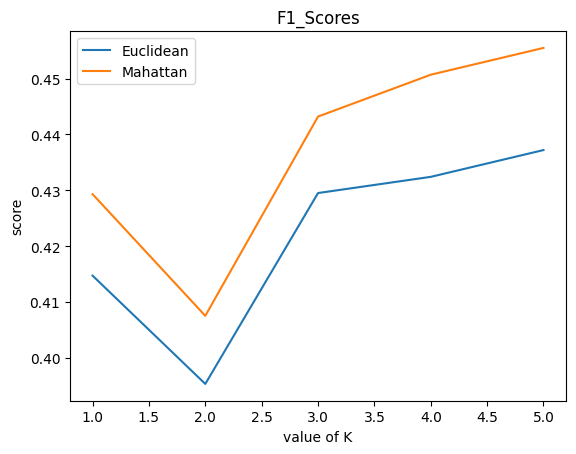

In [14]:
#F1 Scores
plt.plot(x_axis_k_points, f1_euclidean, label='Euclidean')
plt.plot(x_axis_k_points, f1_manhattan, label='Mahattan')
plt.title("F1_Scores")
plt.xlabel("value of K")
plt.ylabel("score")
plt.legend()
plt.show()

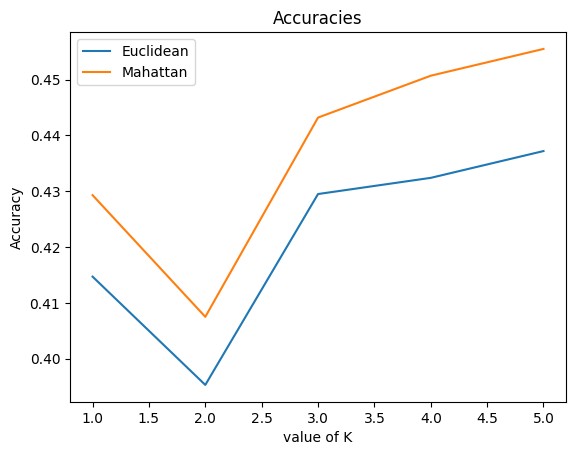

In [15]:
#Accuracies
plt.plot(x_axis_k_points, accuracies_euclidean, label='Euclidean')
plt.plot(x_axis_k_points, accuracies_manhattan, label='Mahattan')
plt.title("Accuracies")
plt.xlabel("value of K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()